# **Se recomienda ejecutar este notebook por Google Colab**

##**Integrantes**


*   Benjamín López
*   Matías Egaña



In [ ]:
import math

# **Métricas de desempeño en un sistema de colas MMs.**

# 1) Factor de utilización.

Fórmula para calcular ρ.

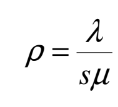

In [ ]:
def rho(lmbda, mu, servers):
  return lmbda / (servers * mu)

# 2) Probabilidad de que el sistema esté vacío.


Fórmula para calcular P0.

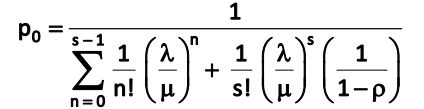

In [ ]:
# Versión adaptada.
def P0(lmbda, mu, servers):
  a = 0
  lmbda_mu_div = lmbda / mu
  for i in range(0, servers):
    a += (lmbda_mu_div)**i / math.factorial(i)

  b = (lmbda_mu_div)**servers / math.factorial(servers)
  c = 1 / (1 - rho(lmbda, mu, servers))
  return 1 / (a + b * c)

# 3) Número promedio de clientes en la cola.


Fórmula para calcular el Lq.

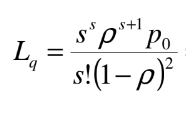

In [ ]:
def Lq(lmbda, mu, servers):
  a = ((servers)**servers)*( rho(lmbda,mu,servers)**(servers+1))* P0(lmbda,mu,servers)
  b = (math.factorial(servers))*((1-rho(lmbda,mu,servers))**2)

  return a/b

# 4) Tiempo promedio de espera en la cola.

Fórmula para calcular el Wq.

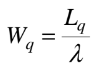



In [ ]:
def Wq(lmbda,mu,servers):
  return Lq(lmbda,mu,servers)/lmbda

# 5) Tiempo promedio transcurrido en el sistema.


Fórmula para calcular W.

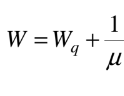

In [ ]:
def W(lmbda,mu,servers):
  return Wq(lmbda,mu,servers) + (1/mu)

# 6) Número medio de clientes en el sistema


Fórmula para calcular L.

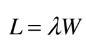

In [ ]:
def L(lmbda,mu,servers):
  _W = W(lmbda,mu,servers)
  return lmbda*_W

Anteriormente se agregaron todas las formúlas, para la metrica de desempeño, pero ahora la aplicaremos a un ejemplo, propuesto en el classroom.

En una librería se dispone de 3 máquinas fotocopiadoras
a disposición del público, Cada máquina es capaz de servir, por
término medio, 8 trabajos cada hora, A la librería llegan como
promedio 5 clientes a la hora,

Parámetros del sistema: **λ = 5 clientes/h**, **μ = 8 clientes/h**, **s = 3
servidores**. El sistema no se satura porque ρ<1.

Se pide.

a) ¿Cuál es la probabilidad de que las tres máquinas estén libres a la vez?

b) ¿Cuál es el número medio de clientes en la cola?

c) ¿Cuál es el tiempo medio de espera en la cola?

d) ¿Cuál es el tiempo medio de espera en el sistema?

e) ¿Cuál es el número medio de clientes en el sistema?

Especificar tasa de llegada(λ), atención(μ) y cantidad de servidores.

In [ ]:
lmbda = 5
mu = 8
"Tasa llegada de clientes"
"lmbda = clientes / unidad de tiempo"
servers = 3

Calculamos ρ.

In [ ]:
rho(lmbda, mu, servers)

0.20833333333333334

**a) ¿Cuál es la probabilidad de que las tres máquinas estén libres a la vez?**

In [ ]:
valorP0 = P0(lmbda,mu,servers)
valorP0Porcentaje = valorP0 * 100
print(str(valorP0)+ " o " + str(valorP0Porcentaje)+ " % de probabilidad que el sistema este vacío")

0.5342706502636204 o 53.427065026362044 % de probabilidad que el sistema este vacío


**b)  ¿Cuál es el número medio de clientes en la cola?**

In [ ]:
valorLq = Lq(lmbda,mu,servers)
print( str(valorLq)+" o "+ str(math.trunc(valorLq))+" Clientes")

0.007226436037369349 o 0 Clientes


**c) ¿Cuál es el tiempo medio de espera en la cola?**

In [ ]:
valorWq = Wq(lmbda,mu,servers)
valorWqMinu = valorWq * 60
print(str(valorWq)+" Horas" + " o "+ str(valorWqMinu) +" Minutos ")

0.0014452872074738699 Horas o 0.08671723244843219 Minutos 


**d) ¿Cuál es el tiempo medio de espera en el sistema?**

In [ ]:
valorW = W(lmbda,mu,servers)
valorWMinu = valorW * 60
print(str(valorW)+" Horas" + " o "+ str(valorWMinu) +" Minutos ")

0.12644528720747386 Horas o 7.586717232448431 Minutos 


**e) ¿Cuál es el número medio de clientes en el sistema?**

In [ ]:
valorL = L(lmbda,mu,servers)
print( str(valorL)+" o "+ str(math.trunc(valorL))+" Clientes")

0.6322264360373693 o 0 Clientes


#**Ejercicio aplicado**
El cine Mega Multiplex tiene una tienda en concesión con tres empleados que atienden a los clientes por un riguroso orden de llegada. El tiempo de servicio por cliente se distribuye exponencialmente, con un promedio de 2 minutos por cliente. Los clientes de la concesión esperan en un amplio vestíbulo, formando una sola fila, y sus llegadas tiene una distribución de Poisson, con un promedio de 81 clientes por hora. Se exhiben cortos durante 10 minutos antes del inicio de cada función. Si el tiempo promedio que pasan en el área de concesión rebasa los
10 minutos, los clientes se sienten insatisfechos.
Se pide.

a) ¿Cuál es la utilización promedio de los empleados de la consesión?

b) ¿Cuál es el tiempo promedio que pasan los clientes en el área de la consesión?


Apartir de la problematica planteada anteriormente se obtienen los siguientes datos:


N° Servidores -> **servers = 3 Empleados.**

Tasa de llegada -> **λ = 81 Clientes/hora.**

Tasa de atención -> **μ = 2 Minuto/Cliente.**
#**Convertir la tasa de atencion a clientes/hora**
Tiempo promedio de servico -> **1/μ = 1/2 -> 0.5 clientes/minutos -> 0.5 x 60 = 30 Clientes/hora.**

Tasa de atención -> **μ = 30 Cliente/hora.**







In [ ]:
servers = 3
lmbda = 81
mu = 30

**a) ¿Cuál es la utilización promedio de los empleados de la consesión?**

Para esto se debe sacar el factor de utilización, el cual tenemos definido anteriormente como la función "rho" y solo le asiganaremos los nuevos valores iniciales.

In [ ]:
# 1.
valorRho = rho(lmbda,mu,servers)
valorRhoPorcentaje = valorRho * 100
print(str(valorRho)+ " o " + str(valorRhoPorcentaje)+ "% de utilización")

0.9 o 90.0% de utilización


**b) ¿Cuál es el tiempo promedio que pasan los clientes en el área de la consesión?**


Para calcular lo que nos piden necesitamos la fórmula de tiempo promedio(W),  pero en esta hace falta información (P0,Lq,Wq), las cuales se pueden obtener con las fórmulas anterior mostradas.



In [ ]:
#2
valorP0 = P0(lmbda,mu,servers)
valorP0Porcentaje = valorP0 * 100
print(str(valorP0)+ " o " + str(valorP0Porcentaje)+ " % Probabilidad que el sistema este vacío")


0.024906600249065998 o 2.4906600249066 % Probabilidad que el sistema este vacío


Ahora con los datos obtenido debemos calcular el número promedio de clientes en la fila.

In [ ]:
#3
valorLq = Lq(lmbda,mu,servers)
print(str(valorLq)+" o "+str(math.trunc(valorLq))+" Clientes")


7.353549190535495 o 7 Clientes


Una vez obtenido el número promedio de clientes, se procede a calcular el tiempo promedio de espera en la fila.

In [ ]:
#4
valorWq = Wq(lmbda,mu,servers)
valorWqMinu = valorLq * 60
print(str(valorWq)+ " Horas o " + str(valorWqMinu)+" Minutos")


0.09078455790784562 Horas o 441.2129514321297 Minutos


Finalmente, ya que tenemos los datos requerido. Procederemos a calcular lo que nos piden.

In [ ]:
#5
valorW = W(lmbda,mu,servers)
valorWMinu = valorW * 60
print(str(valorW)+ " Horas o " + str(valorWMinu)+" Minutos")

0.12411789124117895 Horas o 7.447073474470737 Minutos


**Obteniendo como resultado final lo fórmulado anteriormente.**